In [55]:
data_dir = "/home/pez/phd/writing/writing_logs/dlis"

In [56]:
import matplotlib as mpl

mpl.rcParams["hatch.linewidth"] = 0.6  # previous pdf hatch linewidth
mpl.rcParams["hatch.linewidth"] = 6.0  # previous svg hatch linewidth

nice_fonts = {
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 60,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 60,
    "legend.title_fontsize": 60,
    "xtick.labelsize": 60,
    "ytick.labelsize": 60,
}

mpl.rcParams.update(nice_fonts)

import json
import os

import matplotlib.pyplot as plt
import pandas as pd

In [57]:
def load_data(data_dir: os.PathLike):
    data = pd.DataFrame()
    for file in os.listdir(data_dir):
        if file.endswith(".json"):
            file_path = os.path.join(data_dir, file)
            with open(file_path) as f:
                data = data.append(json.load(f), ignore_index=True)

    data.fillna(0, inplace=True)

    data["time"] = pd.to_datetime(data["time"])
    data["word_count"] = data["word_count"].astype(int)
    data["page_count"] = data["page_count"].astype(int)
    return data


df = load_data(data_dir)
df

/tmp/ipykernel_463936/3920571779.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(json.load(f), ignore_index=True)
/tmp/ipykernel_463936/3920571779.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(json.load(f), ignore_index=True)
/tmp/ipykernel_463936/3920571779.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(json.load(f), ignore_index=True)
/tmp/ipykernel_463936/3920571779.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(json.load(f), ignore_index=True)
/tmp/ipykernel_463936/3920571779.py:7: FutureWarning: The frame.append method is deprecated and 

,time,word_count,page_count
0,2023-02-04 17:40:53,3954,7
1,2023-02-04 18:05:07,4076,7
2,2023-02-04 19:00:17,4431,8
3,2023-02-03 19:01:37,3414,0
4,2023-02-03 19:22:15,3650,0
5,2023-02-06 14:00:44,4820,8
6,2023-02-06 10:00:29,4743,8


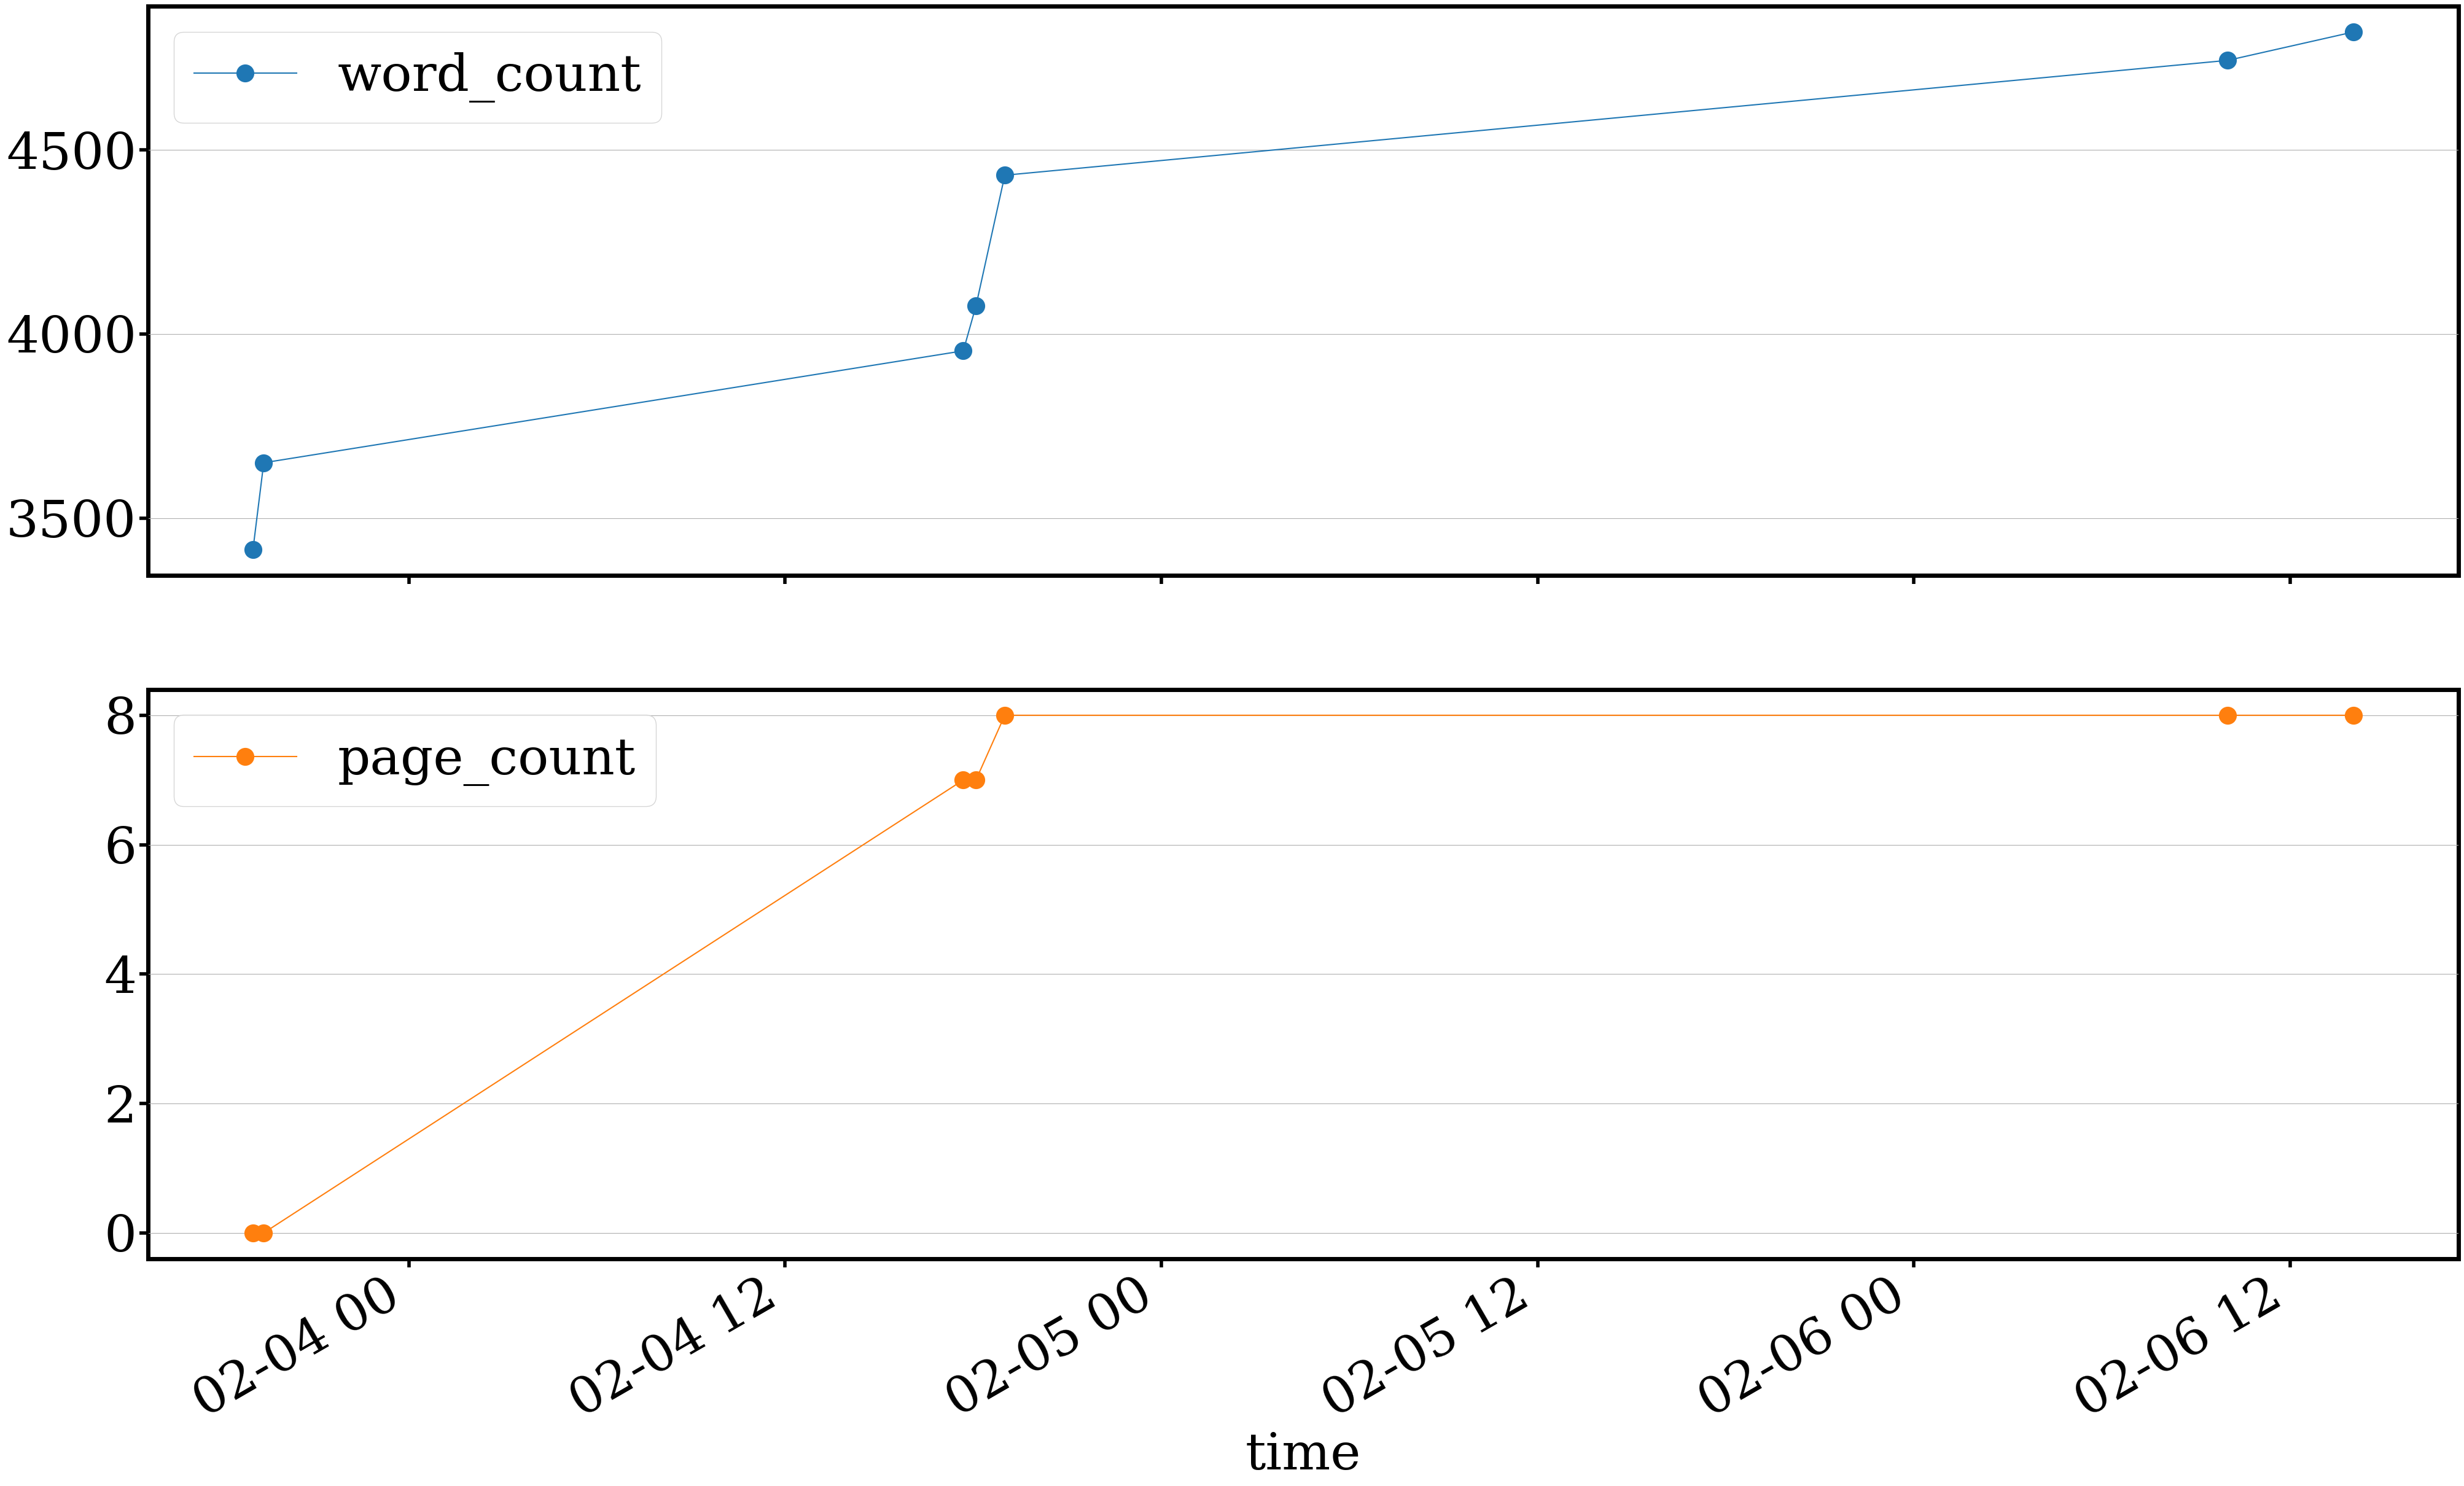

In [58]:
sc = 30
# fig, ax = plt.subplots()


axs = df.plot.line(
    subplots=True, x="time", figsize=(sc * 1.61803, sc), marker="o", markersize=20
)

for ax in axs:
    ax.yaxis.grid()
    ax.patch.set_edgecolor("black")
    ax.patch.set_linewidth(5)

    # custom lines of points
    ax.xaxis.set_tick_params(width=4, length=10)
    ax.yaxis.set_tick_params(width=4, length=10)

In [ ]:
plt.show()